In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib

In [18]:
from google.colab import files
uploaded = files.upload()


Saving ev_data.csv.csv to ev_data.csv (2).csv


In [21]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import joblib

# Step 2: Upload file
from google.colab import files
# The file has already been uploaded, no need to call files.upload() again.
# uploaded = files.upload()

# Step 3: Load and view dataset
# Use the correct filename from the uploaded files
df = pd.read_csv("Electric_Vehicle_Population_Size_History_By_County_.csv.zip")
display(df.head())
display(df.columns)


# Step 4: Clean numeric columns by removing commas and converting to numeric
cols_to_clean = ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']
for col in cols_to_clean:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where conversion to numeric failed
df.dropna(subset=cols_to_clean, inplace=True)

# Step 5: Drop missing values (simplified cleaning)
df.dropna(inplace=True)

# Step 6: Select features and target based on available columns and convert categorical features
X = df[['Plug-In Hybrid Electric Vehicles (PHEVs)', 'County', 'State']]
y = df['Battery Electric Vehicles (BEVs)']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['County', 'State'], drop_first=True)


# Step 7: Train a simple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 8: Save the trained model
joblib.dump(model, 'ev_model.pkl')

# Step 9: Download model file to your PC
files.download('ev_model.pkl')

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


Index(['Date', 'County', 'State', 'Vehicle Primary Use',
       'Battery Electric Vehicles (BEVs)',
       'Plug-In Hybrid Electric Vehicles (PHEVs)',
       'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total',
       'Total Vehicles', 'Percent Electric Vehicles'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
import pandas as pd

# Clean column names
df.columns = df.columns.str.strip()

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove commas and convert numeric columns
vehicle_columns = [
    'Battery Electric Vehicles (BEVs)',
    'Plug-In Hybrid Electric Vehicles (PHEVs)',
    'Electric Vehicle (EV) Total',
    'Non-Electric Vehicle Total',
    'Total Vehicles',
    'Percent Electric Vehicles'
]

for col in vehicle_columns:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 20733 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20733 non-null  datetime64[ns]
 1   County                                    20733 non-null  object        
 2   State                                     20733 non-null  object        
 3   Vehicle Primary Use                       20733 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20733 non-null  float64       
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20733 non-null  float64       
 6   Electric Vehicle (EV) Total               20733 non-null  float64       
 7   Non-Electric Vehicle Total                20733 non-null  float64       
 8   Total Vehicles                            20733 non-null  float64       
 9   Percent Electric Vehicles        

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7.0,0.0,7.0,460.0,467.0,1.50
1,2022-12-31,Prince William,VA,Passenger,1.0,2.0,3.0,188.0,191.0,1.57
2,2020-01-31,Dakota,MN,Passenger,0.0,1.0,1.0,32.0,33.0,3.03
3,2022-06-30,Ferry,WA,Truck,0.0,0.0,0.0,3575.0,3575.0,0.00
4,2021-07-31,Douglas,CO,Passenger,0.0,1.0,1.0,83.0,84.0,1.19


In [24]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

monthly_ev = df.groupby(['Year', 'Month'])['Electric Vehicle (EV) Total'].sum().reset_index()
monthly_ev['Date'] = pd.to_datetime(monthly_ev[['Year', 'Month']].assign(DAY=1))
monthly_ev = monthly_ev.sort_values('Date')


In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

monthly_ev['Month_Number'] = np.arange(len(monthly_ev))
X = monthly_ev[['Month_Number']]
y = monthly_ev['Electric Vehicle (EV) Total']

model = LinearRegression()
model.fit(X, y)


LinearRegression()

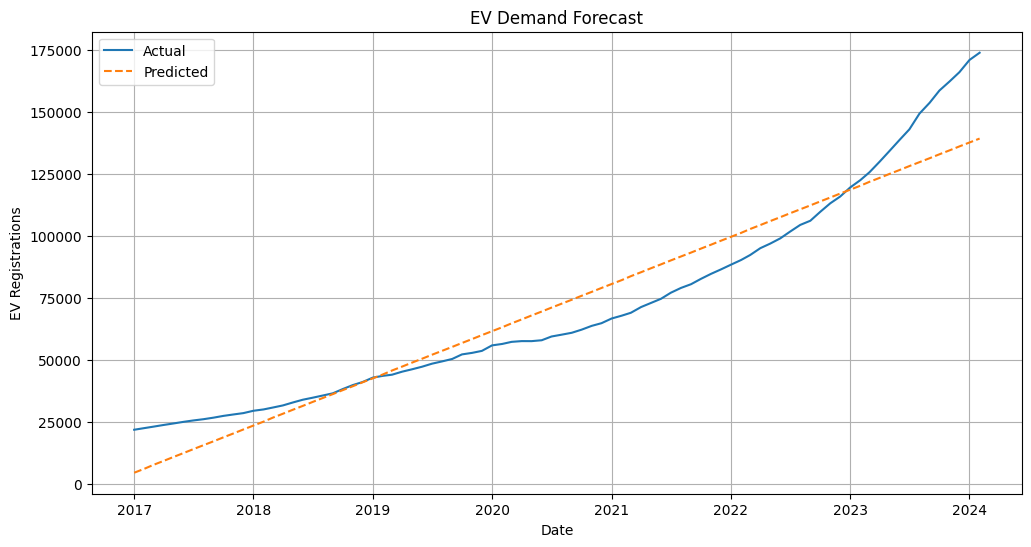

In [26]:
monthly_ev['Predicted_EV_Demand'] = model.predict(X)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_ev['Date'], monthly_ev['Electric Vehicle (EV) Total'], label='Actual')
plt.plot(monthly_ev['Date'], monthly_ev['Predicted_EV_Demand'], label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('EV Registrations')
plt.title('EV Demand Forecast')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
import pickle

with open('ev_model.pkl', 'wb') as f:
    pickle.dump(model, f)
